In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات گرافیکی
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

# تنظیمات pandas برای نمایش بهتر
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')


In [2]:
# مسیر فایل CSV
file_path = "../data/Spotify Quarterly.csv"

# خواندن داده
df = pd.read_csv(file_path)

# نمایش چند ردیف اول
df.head()


,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.00,2276.00,776.00,2713.00,1937.00,776.00,329.00,339.00,-10.00,515.00,210.00,317.00,4.32,347.00,435.00,140.00
1,31-12-2022,3166.00,2365.00,801.00,2717.00,1939.00,778.00,449.00,426.00,23.00,489.00,205.00,295.00,4.55,453.00,415.00,164.00
2,30-09-2022,3036.00,2286.00,750.00,2651.00,1908.00,743.00,385.00,378.00,7.00,456.00,195.00,273.00,4.63,432.00,386.00,160.00
3,30-06-2022,2864.00,2160.00,704.00,2504.00,1804.00,700.00,360.00,356.00,4.00,433.00,188.00,265.00,4.54,391.00,336.00,171.00
4,31-03-2022,2661.00,1990.00,671.00,2379.00,1704.00,675.00,282.00,286.00,-4.00,422.00,182.00,252.00,4.38,296.00,250.00,131.00


In [3]:
# تبدیل تاریخ به فرمت datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# مرتب‌سازی بر اساس تاریخ
df = df.sort_values('Date')

# حذف سطرهایی که مقادیر مالی ندارند (مثلاً سال 2016)
df = df.dropna(subset=['Total Revenue'])

# تبدیل همه‌ی مقادیر عددی به float
cols_to_numeric = df.columns.drop('Date')
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# افزودن ستون سال و فصل برای تحلیل بهتر
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

df.head()


,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost,Year,Quarter
24,2017-03-31,902.00,797.00,105.00,828.00,710.00,118.00,74.00,87.00,-13.00,131.00,52.00,82.00,5.46,110.00,80.00,54.00,2017,1
23,2017-06-30,1007.00,775.00,232.00,904.00,686.00,218.00,103.00,89.00,14.00,138.00,59.00,83.00,5.53,146.00,95.00,70.00,2017,2
22,2017-09-30,1032.00,802.00,230.00,923.00,711.00,212.00,109.00,91.00,18.00,150.00,62.00,91.00,5.06,138.00,98.00,67.00,2017,3
21,2017-12-31,1449.00,867.00,582.00,1018.00,761.00,257.00,130.00,106.00,24.00,160.00,71.00,93.00,5.24,173.00,123.00,73.00,2017,4
20,2018-03-31,1139.00,856.00,283.00,1037.00,767.00,270.00,102.00,89.00,13.00,170.00,75.00,99.00,4.72,138.00,115.00,71.00,2018,1


In [4]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,25,2020-03-30 21:07:12,2017-03-31 00:00:00,2018-09-30 00:00:00,2020-03-31 00:00:00,2021-09-30 00:00:00,2023-03-31 00:00:00,NaN
Total Revenue,25.00,1949.20,902.00,1449.00,1855.00,2501.00,3166.00,688.57
Cost of Revenue,25.00,1448.32,775.00,1010.00,1381.00,1833.00,2365.00,511.59
Gross Profit,25.00,501.28,105.00,373.00,479.00,668.00,801.00,188.49
Premium Revenue,25.00,1721.40,828.00,1210.00,1700.00,2178.00,2717.00,599.34
Premium Cost Revenue,25.00,1247.04,686.00,894.00,1219.00,1545.00,1939.00,409.62
Premium Gross Profit,25.00,474.36,118.00,316.00,481.00,633.00,778.00,191.57
Ad Revenue,25.00,215.76,74.00,130.00,175.00,282.00,449.00,107.58
Ad Cost of revenue,25.00,201.68,87.00,115.00,157.00,286.00,426.00,105.02
Ad gross Profit,25.00,14.08,-16.00,4.00,18.00,25.00,42.00,15.74


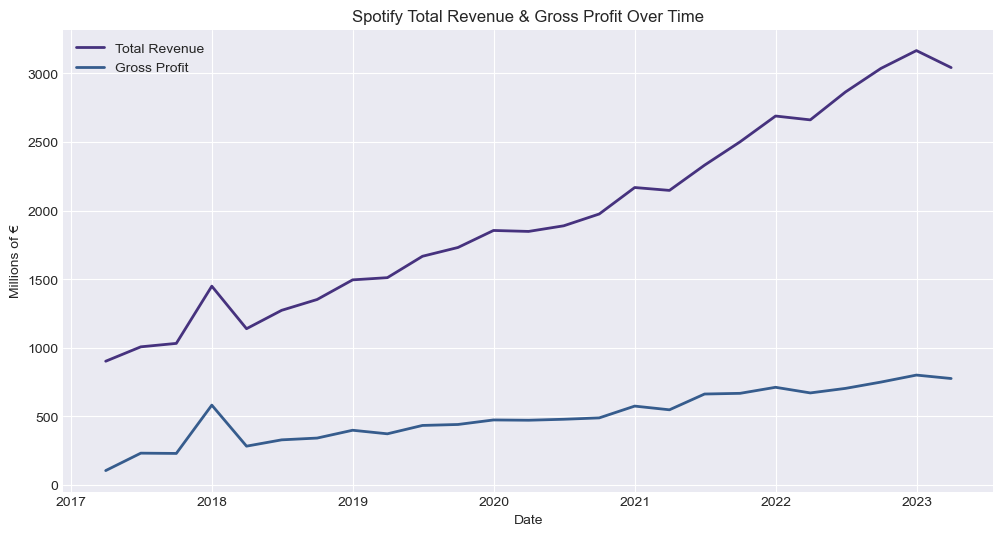

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Total Revenue'], label='Total Revenue', linewidth=2)
plt.plot(df['Date'], df['Gross Profit'], label='Gross Profit', linewidth=2)
plt.title('Spotify Total Revenue & Gross Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Millions of €')
plt.legend()
plt.show()


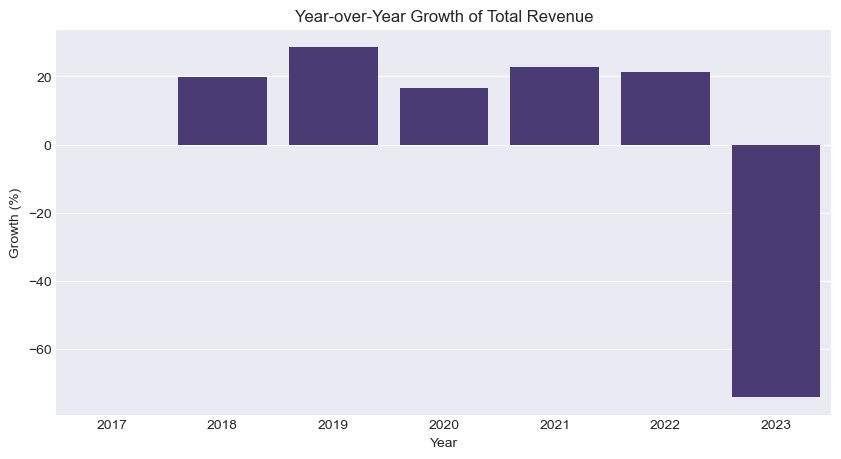

Year
2017      NaN
2018    19.79
2019    28.62
2020    16.50
2021    22.69
2022    21.30
2023   -74.06
Name: Total Revenue, dtype: float64

In [6]:
revenue_yearly = df.groupby('Year')['Total Revenue'].sum()
growth = revenue_yearly.pct_change() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=growth.index, y=growth.values)
plt.title('Year-over-Year Growth of Total Revenue')
plt.ylabel('Growth (%)')
plt.show()

growth


In [7]:
df['Gross Margin %'] = (df['Gross Profit'] / df['Total Revenue']) * 100
df['Premium Share %'] = (df['Premium Revenue'] / df['Total Revenue']) * 100
df['Ad Share %'] = (df['Ad Revenue'] / df['Total Revenue']) * 100

df[['Date','Gross Margin %','Premium Share %','Ad Share %']].tail()


,Date,Gross Margin %,Premium Share %,Ad Share %
4,2022-03-31,25.22,89.40,10.60
3,2022-06-30,24.58,87.43,12.57
2,2022-09-30,24.70,87.32,12.68
1,2022-12-31,25.30,85.82,14.18
0,2023-03-31,25.51,89.18,10.82


In [8]:
cleaned_path = "../data/spotify_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned data saved to {cleaned_path}")


✅ Cleaned data saved to ../data/spotify_cleaned.csv
